In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv("../datasets/Social_Network_Ads.csv")
print(df.shape)
df

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
# Taking the useful values from the dataset

x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [37]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# print("X Train \n",x_train)
# print("X Test \n",x_test)
# print("Y Train \n",y_train)
# print("Y Test \n",x_test)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)




(300, 2)
(300,)
(100, 2)
(100,)


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.svm import SVC

classifier = SVC(kernel = "rbf",random_state=0 )
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy \n",accuracy_score(y_test,y_pred))

Confusion Matrix 
 [[64  4]
 [ 3 29]]
Accuracy 
 0.93


C:\Users\GF LAB\AppData\Local\Temp\ipykernel_8208\3856425963.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_test[y_test == j,0],x_test[y_test == j,1],c=ListedColormap(('red','green'))(i),label=j)


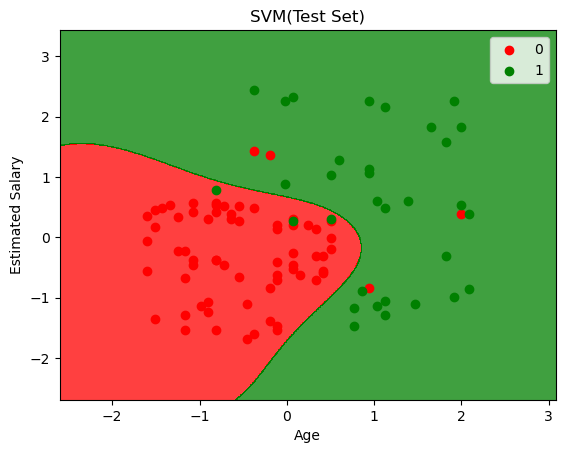

In [58]:
from matplotlib.colors import ListedColormap
x1 , x2 = np.meshgrid(np.arange(start=x_test[:,0].min()-1,stop=x_test[:,0].max()+1, step=0.01),np.arange(start=x_test[:,1].min()-1,stop=x_test[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j,0],x_test[y_test == j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM(Test Set)")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()